# Fuzzy Clustering using QPSO

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## import ExtractRulesQPSO class
import sys, os
sys.path.append(os.getcwd() + '/scripts')
from ExtractRulesQPSO import ExtractRulesQPSO
from FuzzyClustering import FuzzyClustering

## Example 

### Generating synthetic data

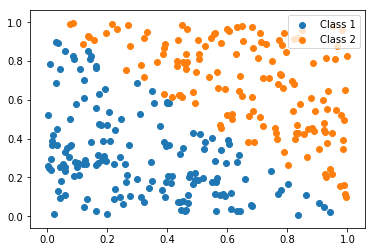

In [2]:
random_numbers = np.random.rand(1000)
N = 300  ## number of data points
tmp_c1 = []
tmp_c2 = []

for i in range(N):
    v_tmp = np.random.rand(2)
    
    if (v_tmp[0] + v_tmp[1] <= 1):
        tmp_c1.append(v_tmp)
    else:
        tmp_c2.append(v_tmp)

## Synthetic data for two classes
data_c1 = np.array(tmp_c1)
data_c2 = np.array(tmp_c2)

plt.scatter(data_c1[:,0], data_c1[:,1], label = 'Class 1')
plt.scatter(data_c2[:,0], data_c2[:,1], label = 'Class 2')
plt.legend()

### Applying fuzzy clustering

In [3]:
fc1 = FuzzyClustering(data_c1)
fc2 = FuzzyClustering(data_c2)

In [4]:
## finding centers
fc1.extractClusteringCenters()
centers_c1 = fc1.getDenormalizedClusterCenters()
fc2.extractClusteringCenters()
centers_c2 = fc2.getDenormalizedClusterCenters()

In [5]:
centers_c1, centers_c2

(array([[0.22381383, 0.26982357],
        [0.58538492, 0.11511254],
        [0.12188745, 0.70069806]]), array([[0.64182116, 0.72056785],
        [0.88734694, 0.43908824],
        [0.32258591, 0.91878831],
        [0.9817705 , 0.95844503]]))

### Plotting resulting cluster centers

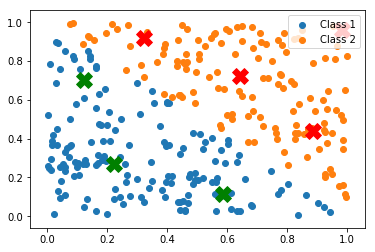

In [6]:
plt.scatter(data_c1[:,0], data_c1[:,1], label = 'Class 1')
plt.scatter(data_c2[:,0], data_c2[:,1], label = 'Class 2')

## Add centers of class 1
for cs in centers_c1:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'green', s = 250)

## Add centers of class 2
for cs in centers_c2:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'red', s = 250)

plt.legend()

## Use QPSO to optimize the rules

In [7]:
qpso = ExtractRulesQPSO(30, 50, 2 * (len(centers_c1) + len(centers_c2)))

In [8]:
qpso.solver([centers_c1, centers_c2], [data_c1, data_c2])

In [9]:
qpso.best_particle

array([-2.95792082e-01,  6.28199979e-02, -1.31373990e+02,  9.96108510e-02,
       -7.88524322e-02,  9.81177439e+00, -5.14378013e+01,  3.27236536e+01,
       -1.70157151e+00, -3.24536441e+00, -4.11844146e+01, -4.37712036e+01,
        1.85965051e+00, -1.59572124e+01])

### Show rules for class 1

In [10]:
centers_c1

array([[0.22381383, 0.26982357],
       [0.58538492, 0.11511254],
       [0.12188745, 0.70069806]])

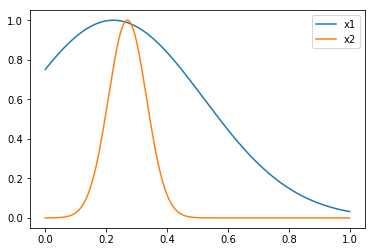

In [11]:
xs = np.linspace(0, 1, 1000)
    
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c1[0][0], qpso.best_particle[0]), label = 'x1')
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c1[0][1], qpso.best_particle[1]), label = 'x2')
plt.legend()

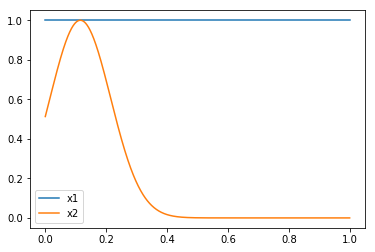

In [12]:
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c1[1][0], qpso.best_particle[2]), label = 'x1')
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c1[1][1], qpso.best_particle[3]), label = 'x2')
plt.legend()

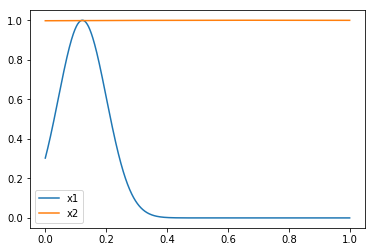

In [13]:
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c1[2][0], qpso.best_particle[4]), label = 'x1')
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c1[2][1], qpso.best_particle[5]), label = 'x2')
plt.legend()

### Show rules for class 2

In [14]:
centers_c2

array([[0.64182116, 0.72056785],
       [0.88734694, 0.43908824],
       [0.32258591, 0.91878831],
       [0.9817705 , 0.95844503]])

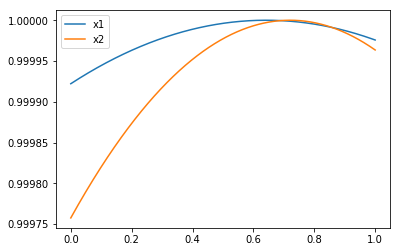

In [15]:
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c2[0][0], qpso.best_particle[6]), label = 'x1')
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c2[0][1], qpso.best_particle[7]), label = 'x2')
plt.legend()

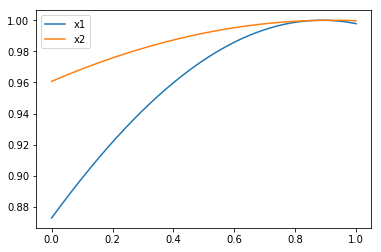

In [16]:
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c2[1][0], qpso.best_particle[8]), label = 'x1')
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c2[2][1], qpso.best_particle[9]), label = 'x2')
plt.legend()

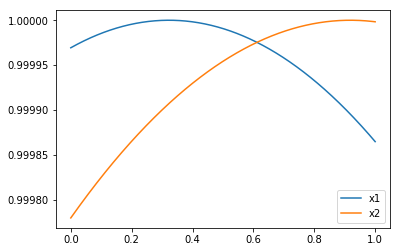

In [17]:
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c2[2][0], qpso.best_particle[10]), label = 'x1')
plt.plot(xs, ExtractRulesQPSO._expMembership(xs, centers_c2[2][1], qpso.best_particle[11]), label = 'x2')
plt.legend()